## HW-1

(1) По определению , если  $a_{i j}=u_i \circ v_j, i=1, \ldots n, j=1, \ldots, m$, то
$$
A=\left\{a_{i j}\right\} \in \mathbb{R}^{n \times m}=u v^{\top} \text {, причём } \operatorname{rank}(A) \leqslant 1 \text { т.е. равен 0, если хотя бы один из векторов нулевой}
$$
(2)

1)
$$
\begin{aligned}
A^{\top} A & =14 \Rightarrow \sigma_1=\sqrt{14} \Rightarrow V=[1] \\
u & =\frac{A v}{\sigma}=\frac{1}{\sqrt{14}}\left[\begin{array}{l}
1 \\
2 \\
3
\end{array}\right] \\
\Rightarrow A & =\underbrace{\frac{1}{\sqrt{14}}\left[\begin{array}{l}
1 \\
2 \\
3
\end{array}\right]}_{U} \cdot \underbrace{[\sqrt{14}]}_{\sum} \cdot \underbrace{[1]^{\top}}_{V^{\top}}
\end{aligned}
$$
2) (я не буду это техать...)

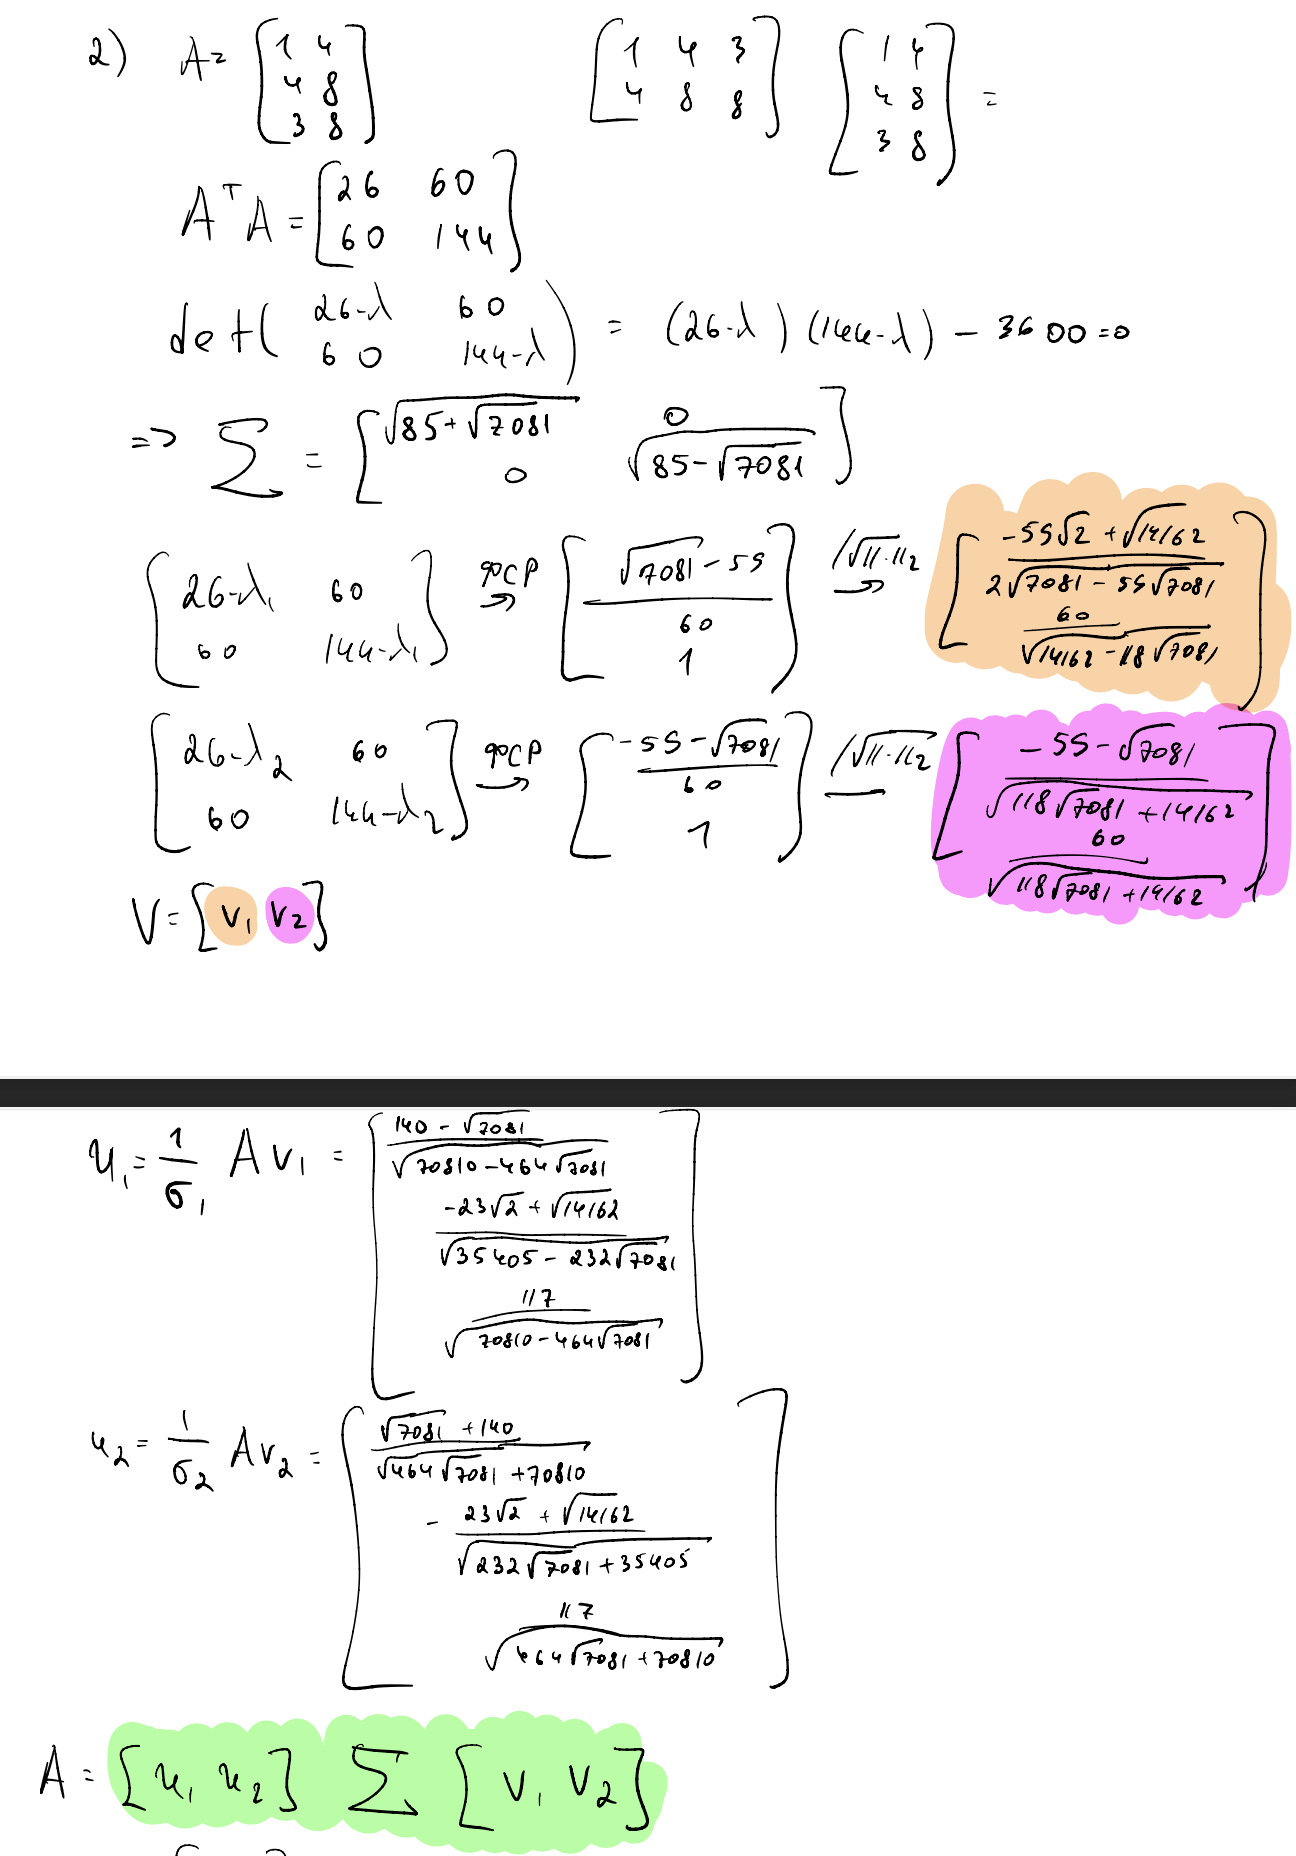


3)
$$
\begin{aligned}
& A=\left[\begin{array}{cc}
0 & 0 \\
32 & 0 \\
0 & 0
\end{array}\right] \\
& A^{\top} A=\left[\begin{array}{ll}
32^2 & 0 \\
0 & 0
\end{array}\right] \Rightarrow \lambda_1=32^2 \Rightarrow \sigma_1=32 \\
\Rightarrow & A=\left[\begin{array}{l}
0 \\
1 \\
0
\end{array}\right] 32 \cdot\left[\begin{array}{ll}
1 & 0
\end{array}\right]
\end{aligned}
$$

(3)

1. Деление на $\sigma$ никак не влияет на ранг, т.к. элементарные преобразования строк/столбоцв не меняют ранг матрицы.
2. Т.к. $\mu\in\langle X^{(1)}, \dots, X^{(m)}\rangle$, то вычитаение его либо никак не изменит ранг, либо понизит на 1 в случае, когда $\exist i:\mu=X^{(i)}$

Пример:


$$A=\left[\begin{array}{cc}
1&0 & 0 \\
0&1 & 0 \\
0 & 0&1
\end{array}\right], \mu=\left[\begin{array}{cc}
1/3 \\
1/3 \\
1/3
\end{array}\right]\implies\left[\begin{array}{cc}
2/3&-1/3 & -1/3 \\
-1/3&2/3 & -1/3 \\
-1/3 &-1/3&2/3
\end{array}\right]\text{ ранг тот же}$$

$$A=\left[\begin{array}{cc}
2&1 & 0 \\
0&1 & 2 \\
0 & 1&2
\end{array}\right], \mu=\left[\begin{array}{cc}
1 \\
1 \\
1
\end{array}\right]\implies\left[\begin{array}{cc}
1&0 & -1 \\
-1&0 & 1 \\
-1 &0&1
\end{array}\right]\text{ ранг понизился на 1}$$

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from skimage import io, color
import requests
from io import BytesIO


def download_image(url):
    response = requests.get(url)
    img = io.imread(BytesIO(response.content))
    return color.rgb2gray(img)  # Convert to grayscale


def update_plot(i, img_plot, error_plot, U, S, V, original_img, errors, ranks, ax1, ax2):
    # Adjust rank based on the frame index
    if i < 70:
        rank = i + 1
    else:
        rank = 70 + (i - 69) * 10

    Sr = S.copy()
    Sr[rank:] = 0
    reconstructed_img = U @ np.diag(Sr) @ V

    # Calculate relative error
    relative_error = np.linalg.norm(original_img - reconstructed_img) / np.linalg.norm(original_img)
    errors.append(relative_error)
    ranks.append(rank)

    # Update the image plot and title
    img_plot.set_data(reconstructed_img)
    ax1.set_title(f"Image compression with SVD\n Rank {rank}; Relative error {relative_error:.2f}")

    # Remove axis ticks and labels from the first subplot (ax1)
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Update the error plot
    error_plot.set_data(ranks, errors)
    ax2.set_xlim(1, len(S))
    ax2.grid(linestyle=":")
    ax2.set_ylim(1e-4, 0.5)
    ax2.set_ylabel('Relative Error')
    ax2.set_xlabel('Rank')
    ax2.set_title('Relative Error over Rank')
    ax2.semilogy()

    # Set xticks to show rank numbers
    ax2.set_xticks(range(1, len(S) + 1, max(len(S) // 10, 1)))  # Adjust the step size as needed
    plt.tight_layout()

    return img_plot, error_plot


def create_animation(image, filename='svd_animation.mp4'):
    U, S, V = np.linalg.svd(image, full_matrices=False)
    errors = []
    ranks = []

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 8))
    img_plot = ax1.imshow(image, cmap='gray', animated=True)
    error_plot, = ax2.plot([], [], 'r-', animated=True)  # Initial empty plot for errors

    # Add watermark
    ax1.text(1, 1.02, '@fminxyz', transform=ax1.transAxes, color='gray', va='bottom', ha='right', fontsize=9)

    # Determine frames for the animation
    initial_frames = list(range(70))  # First 70 ranks
    subsequent_frames = list(range(70, len(S), 10))  # Every 10th rank after 70
    frames = initial_frames + subsequent_frames

    ani = animation.FuncAnimation(fig, update_plot, frames=len(frames),
                                  fargs=(img_plot, error_plot, U, S, V, image, errors, ranks, ax1, ax2), interval=50,
                                  blit=True)
    ani.save(filename, writer='ffmpeg', fps=8, dpi=300)


# URL of the image
url = "https://www.meme-arsenal.com/memes/05406449d550a459240f1e683a7ca16c.jpg"

# Download the image and create the animation
image = download_image(url)
create_animation(image)

(5)

1)
$$
\begin{aligned}
& r_k=k^{\frac{1}{2}} \\
& \lim _{k \rightarrow \infty} \sqrt{k}=\infty \text { -- расходится }
\end{aligned}
$$
2)
$$
\begin{aligned}
r_k & =k^{-\frac{1}{2}} \\
& \lim _{k \rightarrow \infty} \frac{(k+1)^{-\frac{1}{2}}}{k^{-\frac{1}{2}}}=1\text { -- сходится }
\end{aligned}
$$
3)
$$
\begin{aligned}
r_k= & 0.808^k \\
& \lim _{k \rightarrow \infty} \sqrt[k]{0.808^k}=0.808\text{ -- сходится }
\end{aligned}
$$
4)
$$
\begin{aligned}
& r_k=0.808^{2^k} \\
& \lim _{k \rightarrow \infty} \frac{0.808^{2^k \cdot 2}}{0.808^{2^k}}=0.808^2 \text{ -- сходится } 
\end{aligned}
$$
(6)

$$r_k=\frac{1}{k!}$$

$$\lim_{k\to\infin}\frac{k!}{(k+1)!}=0\text{ -- super linear}$$

$$\lim_{k\to\infin}\frac{\frac{1}{(k+1)!}-L}{(\frac{1}{k!}-L)^2}=\lim_{k\to\infin}\frac{k!}{k+1}=\infin\text{ -- отсутствует квадратичная сходимость}$$

(7)
$$
\begin{aligned}
& r_k= \begin{cases}\frac{1}{k}, & \text { if } k \text { is even } \\
e^{-k}, & \text { if } k \text { is odd }\end{cases} \\
& \lim _{k \rightarrow \infty}\left\{\begin{array}{l}
\frac{k}{k+1}=0 \\
\frac{e^k}{e^{k+1}}=\frac{1}{e}<1
\end{array}\right. \Rightarrow \text{сходится}
&
\end{aligned}

$$



(8)
$$
\begin{aligned}
& r_k=\left\{\begin{array}{l}
\left(\frac{1}{4}\right)^{2^k}, \quad \text { if k is even } \\
\frac{r_{k-1}}{k},  \quad \text { if k is odd }
\end{array}\right. \\


& \lim _{k \rightarrow \infty}\left\{\begin{array}{l}
\frac{\left(\frac{1}{4}\right)^{2 k+1}}{\left(\frac{1}{4}\right)^{2 k}}=\left(\frac{1}{4}\right)^2=\frac{1}{16} \\
\frac{r_k}{r_{k-1}}=\frac{1}{k}
\end{array} \Rightarrow\right. \text { сходится }
\end{aligned}
$$

(9)

Хотим, чтобы $$L=\lim_{k\to\infin}r_k=0$$ $$M=\frac{r_{k+1}}{r_k^2}=\lim_{k\to\infin}\frac{|r_{k+1} - L|}{|r_k-L|^2}\implies\text{ квадратичная сходимость}$$ $$\implies M\in[0,+\infin), r_0\geqslant 0$$


(10)
$$
\begin{aligned}
& r_{m+s}=q r_{m+s-1} \iff \lim _{m+s \rightarrow \infty} \sqrt[m+s]{r_{m+s}}=q \iff \lim _{m \rightarrow \infty} \sqrt[m]{r_m}=q \iff r_m=q r_{m-1}
\end{aligned}
$$

## HW-2

(1)

$$f(x_k-\alpha \nabla f(x_k))\leqslant f(x_k)- c\alpha\|\nabla f(x_k)\|_2^2$$

Запишем Тейлоровскую апроксимацию до второго порядка для функии $\Phi(\alpha) = f(x_k-\alpha\nabla f(x_k))$:$$\Phi(\alpha)\approx f(x_k) - \alpha\|\nabla f(x_k)\|_2^2+\frac{\alpha^2}{2}\|\nabla^2 f(x_k)\|_2^2$$

$$\frac{\partial \Phi(\alpha)}{\partial\alpha}=-\|\nabla f(x_k)\|_2^2+\alpha\|\nabla^2 f(x_k)\|_2^2=0\implies\alpha = \frac{\|\nabla f(x_k)\|_2^2}{\|\nabla^2 f(x_k)\|_2^2}$$

$$\implies f(x_k) - \frac{\|\nabla f(x_k)\|_2^2}{\|\nabla^2 f(x_k)\|_2^2}\cdot\|\nabla f(x_k)\|_2^2 + \frac{\|\nabla f(x_k)\|_2^4}{2\|\nabla^2 f(x_k)\|_2^4}\|\nabla^2 f(x_k)\|_2^2\leqslant f(x_k)-c\cdot\frac{\|\nabla f(x_k)\|_2^2}{\|\nabla^2 f(x_k)\|_2^2}\|\nabla f(x_k)\|_2^2$$

$$\implies \left(c-\frac{1}{2}\right)\underbrace{\frac{\|\nabla f(x_k)\|_2^4}{\|\nabla^2 f(x_k)\|_2^2}}_{\geqslant0}\leqslant0\implies c\in\left[0, \frac{1}{2}\right]$$

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import warnings

warnings.filterwarnings('ignore')

np.random.seed(214)

In [89]:
def quadratic_function(x, A, b):
    return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x)


def grad_quadratic(x, A, b):
    return np.dot(A, x) - b


def generate_quadratic_problem(cond_number):
    # Random symmetric matrix
    M = np.random.randn(2, 2)
    M = np.dot(M, M.T)

    # Ensure the matrix has the desired condition number
    U, s, V = np.linalg.svd(M)
    s = np.linspace(cond_number, 1, len(s))  # Spread the singular values
    A = np.dot(U, np.dot(np.diag(s), V))

    # Random b
    b = np.random.randn(2)

    return A, b

In [90]:
def rosenbrock_function(x):
    return 10.0 * (x[1] - x[0] ** 2) ** 2 + (x[0] - 1) ** 2


def grad_rosenbrock(x):
    dx0 = -40 * (x[1] - x[0] ** 2) * x[0] + 2 * (x[0] - 1)
    dx1 = 20 * (x[1] - x[0] ** 2)
    return np.array([dx0, dx1])

In [91]:
def gradient_descent(start_point, func, grad_func, stepsize_func, max_iter=800):
    x = start_point.copy()
    trajectory = [x.copy()]
    func_values = [func(x)]

    for _ in range(max_iter):
        grad = grad_func(x)
        step_size = stepsize_func(x, grad)
        x -= step_size * grad
        trajectory.append(x.copy())
        func_values.append(func(x))
        if np.abs(trajectory[-2] - trajectory[-1]).max() < 1e-6:
            break

    return np.array(trajectory), np.array(func_values)

In [92]:
def backtracking_line_search(x, grad, func):
    def objective(t):
        return func(x - t * grad)

    res = minimize_scalar(objective, method='golden')
    return res.x

In [93]:
def sufficient_decrease_condition(x, grad, func, c=1e-4):
    t = 1.0
    while func(x - t * grad) > func(x) - c * t * np.linalg.norm(grad) ** 2:
        t /= 2
    return t

In [94]:
def curvature_condition(x, grad, grad_func, c=0.9):
    t = 1.0
    while grad_func(x - t * grad).T @ grad > c * grad.T @ grad:
        t /= 2
    return t

In [95]:
def goldstein_condition(x, grad, func, c=1e-4):
    t = 1.0
    while (func(x - t * grad) > func(x) - c * t * np.linalg.norm(grad) ** 2 or
           func(x - t * grad) < func(x) - (1 - c) * t * np.linalg.norm(grad) ** 2):
        t /= 2
    return t

In [96]:
def wolfe_condition(x, grad, func, grad_func, c1=1e-4, c2=0.9):
    t = 1.0
    while (func(x - t * grad) > func(x) - c1 * t * np.linalg.norm(grad) ** 2 or
           grad_func(x - t * grad).T @ grad > c2 * grad.T @ grad):
        t /= 2
    return t

In [97]:
def dichotomy(x, grad, func):
    c, d = 0.0, 1.0
    s = (c + d) / 2.0
    while abs(d - c) > 1e-6:
        t = (c + s) / 2.0
        if func(x - t * grad) <= func(x - s * grad):
            d = s
            s = t
        else:
            z = (d + s) / 2.0
            if func(x - s * grad) <= func(x - z * grad):
                c = t
                d = z
            else:
                c = s
                s = z
    return s

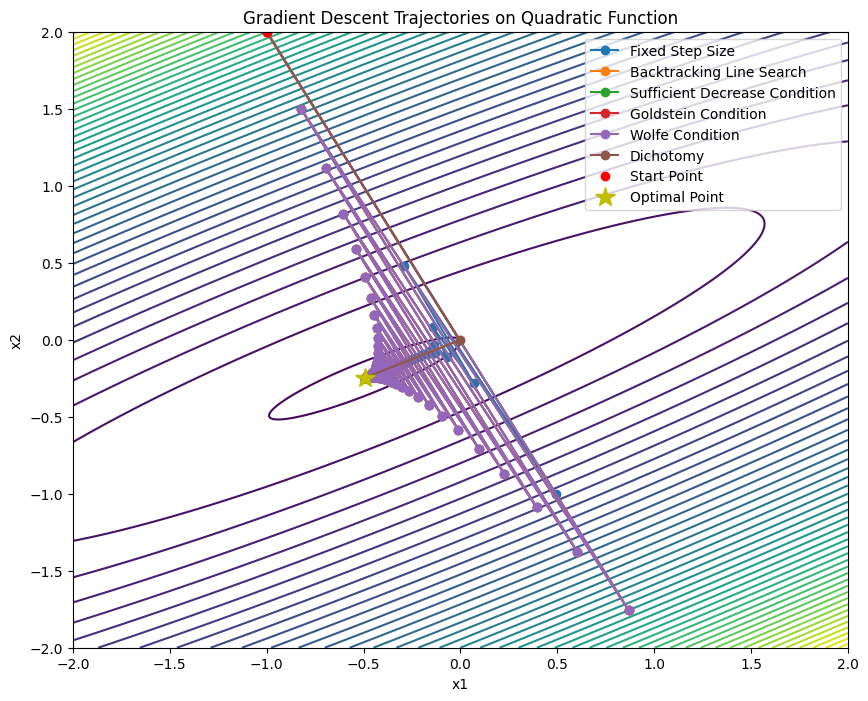

In [98]:
cond_number = 30
A, b = generate_quadratic_problem(cond_number)

# Starting point
start_point = np.array([-1.0, 2.0])
# Perform gradient descent with both strategies
trajectory_fixed, func_values_fixed = gradient_descent(start_point, lambda x: quadratic_function(x, A, b),
                                                       lambda x: grad_quadratic(x, A, b), lambda x, g: 5e-2)
trajectory_backtracking, func_values_backtracking = gradient_descent(start_point, lambda x: quadratic_function(x, A, b),
                                                                     lambda x: grad_quadratic(x, A, b),
                                                                     lambda x, g: backtracking_line_search(x, g, lambda
                                                                         y: quadratic_function(y, A, b)))
trajectory_armijo, func_values_armijo = gradient_descent(start_point, lambda x: quadratic_function(x, A, b),
                                                         lambda x: grad_quadratic(x, A, b),
                                                         lambda x, g: sufficient_decrease_condition(x, g, lambda
                                                             y: quadratic_function(y, A, b)))
trajectory_goldstein, func_values_goldstein = gradient_descent(start_point, lambda x: quadratic_function(x, A, b),
                                                               lambda x: grad_quadratic(x, A, b),
                                                               lambda x, g: goldstein_condition(x, g, lambda
                                                                   y: quadratic_function(y, A, b)))
trajectory_curvature, func_values_curvature = gradient_descent(start_point, lambda x: quadratic_function(x, A, b),
                                                               lambda x: grad_quadratic(x, A, b),
                                                               lambda x, g: curvature_condition(x, g, lambda
                                                                   y: grad_quadratic(y, A, b)))
trajectory_wolfe, func_values_wolfe = gradient_descent(start_point, lambda x: quadratic_function(x, A, b),
                                                       lambda x: grad_quadratic(x, A, b),
                                                       lambda x, g: wolfe_condition(x, g, lambda
                                                           y: quadratic_function(y, A, b), lambda
                                                                                        z: grad_quadratic(z, A, b)))
trajectory_dichotomy, func_values_dichotomy = gradient_descent(start_point, lambda x: quadratic_function(x, A, b),
                                                               lambda x: grad_quadratic(x, A, b),
                                                               lambda x, g: dichotomy(x, g, lambda
                                                                   y: quadratic_function(y, A, b)))

x1, x2 = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
Z = np.array([quadratic_function(np.array([x, y]), A, b) for x, y in zip(x1.flatten(), x2.flatten())]).reshape(x1.shape)
plt.figure(figsize=(10, 8))
plt.contour(x1, x2, Z, levels=50, cmap='viridis')
plt.plot(trajectory_fixed[:, 0], trajectory_fixed[:, 1], 'o-', label='Fixed Step Size')
plt.plot(trajectory_backtracking[:, 0], trajectory_backtracking[:, 1], 'o-', label='Backtracking Line Search')
plt.plot(trajectory_armijo[:, 0], trajectory_armijo[:, 1], 'o-', label='Sufficient Decrease Condition')
plt.plot(trajectory_goldstein[:, 0], trajectory_goldstein[:, 1], 'o-', label='Goldstein Condition')
# plt.plot(trajectory_curvature[:, 0], trajectory_curvature[:, 1], 'o-', label='Curvature Condition') # его пришлось убрать, потому что он всё портит
plt.plot(trajectory_wolfe[:, 0], trajectory_wolfe[:, 1], 'o-', label='Wolfe Condition')
plt.plot(trajectory_dichotomy[:, 0], trajectory_dichotomy[:, 1], 'o-', label='Dichotomy')

# Add markers for start and optimal points
plt.plot(start_point[0], start_point[1], 'ro', label='Start Point')
optimal_point = np.linalg.solve(A, b)
plt.plot(optimal_point[0], optimal_point[1], 'y*', markersize=15, label='Optimal Point')

plt.legend()
plt.title('Gradient Descent Trajectories on Quadratic Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


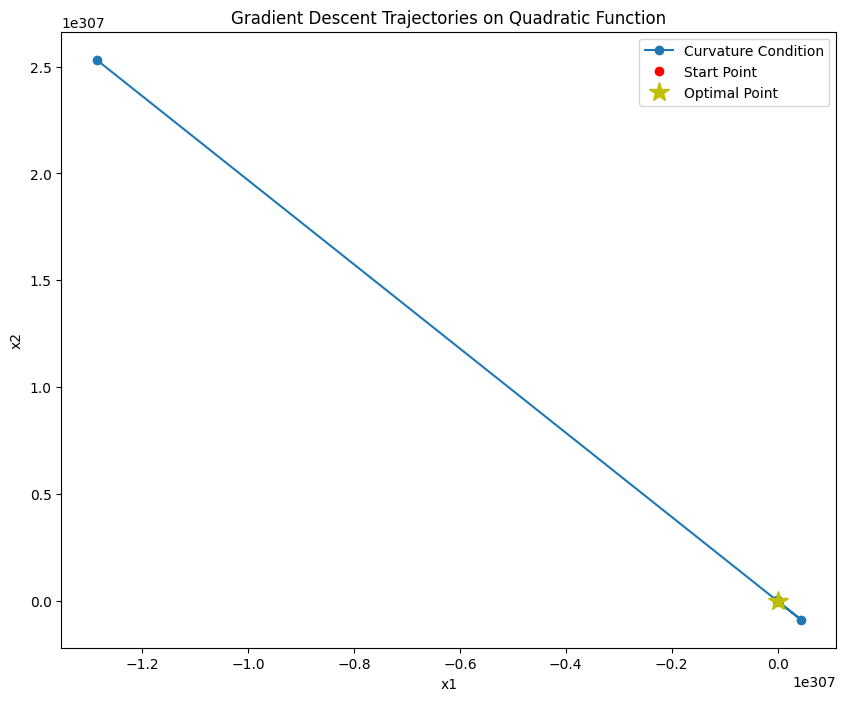

In [99]:
x1, x2 = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
Z = np.array([quadratic_function(np.array([x, y]), A, b) for x, y in zip(x1.flatten(), x2.flatten())]).reshape(x1.shape)
plt.figure(figsize=(10, 8))
plt.contour(x1, x2, Z, levels=50, cmap='viridis')
plt.plot(trajectory_curvature[:, 0], trajectory_curvature[:, 1], 'o-', label='Curvature Condition')
plt.plot(start_point[0], start_point[1], 'ro', label='Start Point')
optimal_point = np.linalg.solve(A, b)
plt.plot(optimal_point[0], optimal_point[1], 'y*', markersize=15, label='Optimal Point')

plt.legend()
plt.title('Gradient Descent Trajectories on Quadratic Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

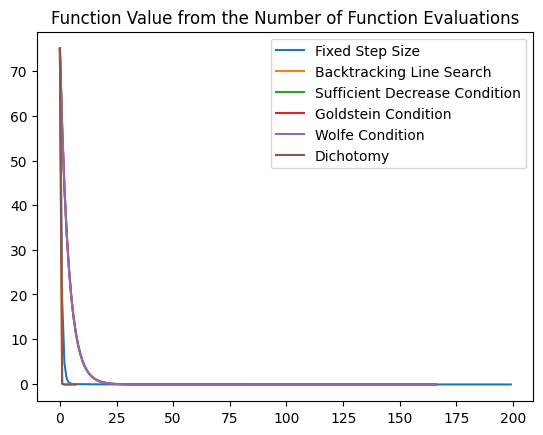

In [100]:
plt.plot(func_values_fixed, label='Fixed Step Size')
plt.plot(func_values_backtracking, label='Backtracking Line Search')
plt.plot(func_values_armijo, label='Sufficient Decrease Condition')
plt.plot(func_values_goldstein, label='Goldstein Condition')
# plt.plot(func_values_curvature, label='Curvature Condition')
plt.plot(func_values_wolfe, label='Wolfe Condition')
plt.plot(func_values_dichotomy, label='Dichotomy')
plt.legend()
plt.title('Function Value from the Number of Function Evaluations')
plt.show()


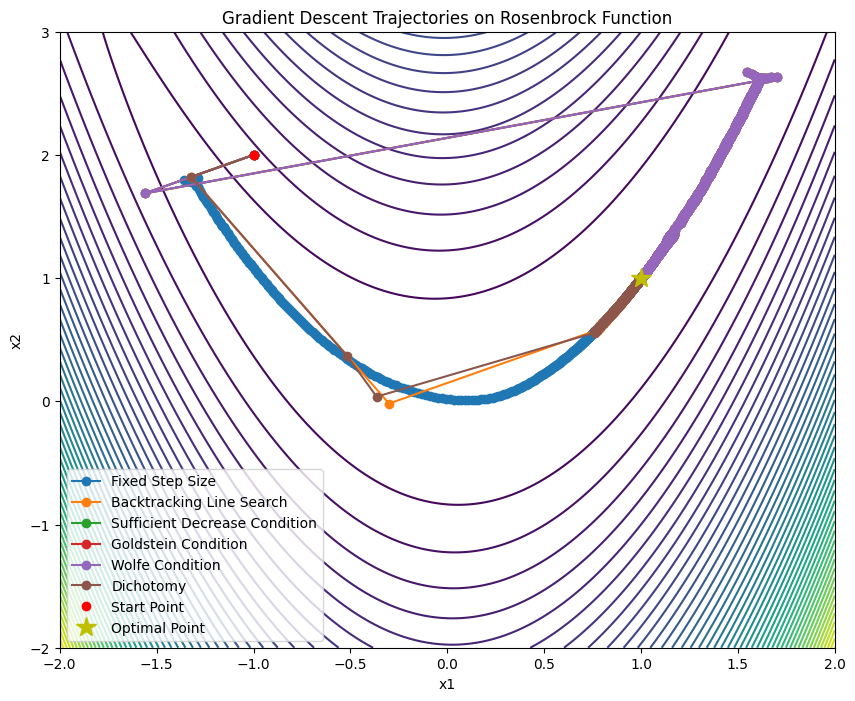

In [104]:
trajectory_fixed, func_values_fixed = gradient_descent(start_point, rosenbrock_function, grad_rosenbrock,
                                                       lambda x, g: 1e-2)
trajectory_backtracking, func_values_backtracking = gradient_descent(start_point, rosenbrock_function, grad_rosenbrock,
                                                                     lambda x, g: backtracking_line_search(x, g,
                                                                                                           rosenbrock_function))
trajectory_armijo, func_values_armijo = gradient_descent(start_point, rosenbrock_function,
                                                         grad_rosenbrock,
                                                         lambda x, g: sufficient_decrease_condition(x, g,
                                                                                                    rosenbrock_function))
trajectory_goldstein, func_values_goldstein = gradient_descent(start_point, rosenbrock_function,
                                                               grad_rosenbrock,
                                                               lambda x, g: goldstein_condition(x, g,
                                                                                                rosenbrock_function))
trajectory_curvature, func_values_curvature = gradient_descent(start_point, rosenbrock_function,
                                                               grad_rosenbrock,
                                                               lambda x, g: curvature_condition(x, g, grad_rosenbrock))
trajectory_wolfe, func_values_wolfe = gradient_descent(start_point, rosenbrock_function, grad_rosenbrock,
                                                       lambda x, g: wolfe_condition(x, g, rosenbrock_function,
                                                                                    grad_rosenbrock))
trajectory_dichotomy, func_values_dichotomy = gradient_descent(start_point, rosenbrock_function,
                                                               grad_rosenbrock,
                                                               lambda x, g: dichotomy(x, g, rosenbrock_function))

# Plot the trajectories on a contour plot
x1, x2 = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 3, 400))
Z = np.array([rosenbrock_function(np.array([x, y]), ) for x, y in zip(x1.flatten(), x2.flatten())]).reshape(x1.shape)

plt.figure(figsize=(10, 8))
plt.contour(x1, x2, Z, levels=50, cmap='viridis')
plt.plot(trajectory_fixed[:, 0], trajectory_fixed[:, 1], 'o-', label='Fixed Step Size')
plt.plot(trajectory_backtracking[:, 0], trajectory_backtracking[:, 1], 'o-', label='Backtracking Line Search')
plt.plot(trajectory_armijo[:, 0], trajectory_armijo[:, 1], 'o-', label='Sufficient Decrease Condition')
plt.plot(trajectory_goldstein[:, 0], trajectory_goldstein[:, 1], 'o-', label='Goldstein Condition')
# plt.plot(trajectory_curvature[:, 0], trajectory_curvature[:, 1], 'o-', label='Curvature Condition') # та же история
plt.plot(trajectory_wolfe[:, 0], trajectory_wolfe[:, 1], 'o-', label='Wolfe Condition')
plt.plot(trajectory_dichotomy[:, 0], trajectory_dichotomy[:, 1], 'o-', label='Dichotomy')

# Add markers for start and optimal points
plt.plot(start_point[0], start_point[1], 'ro', label='Start Point')
plt.plot(1, 1, 'y*', markersize=15, label='Optimal Point')

plt.legend()
plt.title('Gradient Descent Trajectories on Rosenbrock Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


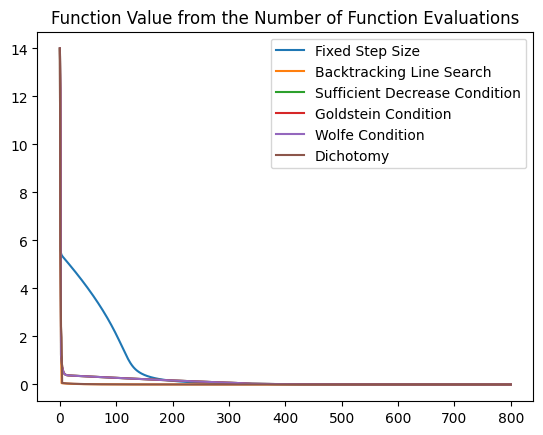

In [103]:
plt.plot(func_values_fixed, label='Fixed Step Size')
plt.plot(func_values_backtracking, label='Backtracking Line Search')
plt.plot(func_values_armijo, label='Sufficient Decrease Condition')
plt.plot(func_values_goldstein, label='Goldstein Condition')
# plt.plot(func_values_curvature, label='Curvature Condition')
plt.plot(func_values_wolfe, label='Wolfe Condition')
plt.plot(func_values_dichotomy, label='Dichotomy')
plt.legend()
plt.title('Function Value from the Number of Function Evaluations')
plt.show()

(1)

$$
\begin{aligned}
& f(x)=\operatorname{tr}\left(A^{\top} A x x^{\top}\right) \\
& d f=d\operatorname{tr}(...)=\operatorname{tr}\left(d\left(A^{\top} A x x^{\top}\right)\right)=\operatorname{tr}\left(A^{\top} A\left(d x x^{\top}+x d x^{\top}\right)\right)= \\
= & \operatorname{tr}\left(x^{\top} A^{\top} A d x\right)+\operatorname{tr}\left(A^{\top} A x d x^{\top}\right)=\operatorname{tr}\left(2 x^{\top} A^{\top} A d x\right) \Rightarrow \nabla f=2 A^{\top} A x \\

\end{aligned}
$$
(2)
$$
\begin{array}{ll}
f(x)=\frac{1}{2}\|A x-b\|_2^2 \\
\left.d f=d \frac{1}{2}\langle A x-b, A x-b\rangle=\frac{1}{2} \cdot 2 \cdot A x-b, A d x\right\rangle & =\left\langle A^{\top}(A x-b), d x\right\rangle \\
d\left(A^{\top}(A x-b)\right)=A^{\top} A d x \Rightarrow \nabla^2 f=A^{\top} A & \Rightarrow \nabla f=A^{\top}(A x-b)
\end{array}
$$
(3)

$$
\begin{aligned}
& f(x)=\frac{1}{m} \sum \log \left(1+\exp \left(a_i^{\top} x\right)\right)+\frac{\mu}{2}\|x\|_2^2 \\
& d f(x)=\frac{1}{m} \sum d \log \left(1+\exp \left(a_i^{\top} x\right)\right)+\frac{\mu}{2} d\langle x, x\rangle= \\
& =\frac{1}{m} \sum \frac{d \exp \left(a_i^{\top} x\right)}{1+\exp \left(a_i^{\top} x\right)}+\frac{\mu}{2} \cdot 2\langle x, d x\rangle=\frac{1}{m} \sum \frac{\exp \left(a_i^{\top} x\right) \cdot\left\langle a_i, d x\right\rangle}{1+\exp \left(a_i^{\top} x\right)}+\mu\langle x, d x\rangle \\
& \Rightarrow \nabla f=\frac{1}{m} \sum \frac{\exp \left(a_i^{\top} x\right) \cdot a_i}{1+\exp \left(a_i^{\top} x\right)}+\mu x \\
& d(\nabla f)=\frac{1}{m} \sum a_i d \frac{\exp \left(a_i^{\top} x\right)}{1+\exp \left(a_i^{\top} x\right)}+\mu I d x=\end{aligned}$$

$$d \frac{\exp \left(a_i^{\top} x\right)}{1+\exp \left(a_i^{\top} x\right)} = \frac{(1+\exp (a_i^{\top} x)) d\left(\exp \left(a_i^{\top} x\right)\right)-\exp \left(a_i^{\top} x\right) d\left(1+\exp \left(a_i^{\top} x\right)\right)}{\left(1+\exp \left(a_i^{\top} x\right)\right)^2}= \\
=\frac{\left(\exp \left(a_i^{\top} x\right)\right) a_i^{\top} d x}
{\left(1+\exp \left(a_i^{\top} x\right)\right)^2} \implies
 \frac{1}{m} \sum a_i \frac{\left(\exp \left(a_i^{\top} x\right)\right) a_i^{\top} d x}
{\left(1+\exp \left(a_i^{\top} x\right)\right)^2}+\mu I d v \\
 \Rightarrow \nabla^2 f=\frac{1}{m} \sum a_i \frac{\left(\exp \left(a_i^{\top} x\right)\right) a_i^{\top}}
{\left(1+\exp \left(a_i^{\top} x\right)\right)^2}+\mu I \\
$$

(4)
$$
\begin{aligned}
& f=\operatorname{tr}\left(e^A\right), e^A=\sum_{k=0}^{\infty} \frac{A^k}{k !} \\
& \begin{aligned}
\left.d f=\operatorname{tr}\left(\sum_{k=0}^{\infty} \frac{d A^k}{k !}\right)=\sum_{k=0}^{\infty} \operatorname{tr}\left(\frac{d\left(A^k\right.}{k !}\right)\right) & =\sum_{k=1}^{\infty} \operatorname{tr}\left(\frac{k A^{k-1} d A}{k !}\right)= \\
& =\sum_{k=1}^{\infty} \operatorname{tr}\left(\frac{A^{k-1}}{(k-1) !} d A\right) \\
& \Rightarrow \nabla f^2=\left(e^A\right)^{\top}
\end{aligned}
\end{aligned}
$$
(5)
$$
\begin{aligned}
& f(t)=\operatorname{det}(A-t I) / / \operatorname{tr}(\operatorname{det}(A-I t))=\operatorname{det}(A-I t)/ / \\
& \frac{\partial f}{\partial t}=\operatorname{tr}\left(\operatorname{det}(A-I t)(A-I t)^{-T}(-I)\right)=\operatorname{tr}\left(-\operatorname{det}(A-I t)(A-I t)^{-T}\right) \\
& \frac{\partial^2 f}{\partial t^2}=-\operatorname{tr}\left(\frac{\partial}{\partial t}(\operatorname{det}(A-I t))(A-I t)^{-T}+\operatorname{det}(A-I t) \cdot \frac{\partial}{\partial t}\left((A-I t)^{-T}\right)=\right. \\
& =-\operatorname{tr}\left(-\operatorname{tr}\left(\operatorname{det}(A-I t)(A-I t)^{-\top}\right)(A-I t)^{-\top}+\operatorname{det}(A-I t)\left((A-I t)^{\top}\right)^{-2}\right)
\end{aligned}
$$

(6)
\begin{aligned}
& f(x)=\operatorname{tr}\left(A x^2 B x^{-T}\right) \\
& d t=\operatorname{tr}\left(d\left(A x^2 B x^{-T}\right)\right)=\operatorname{tr}\left(A d\left(x^2\right) B x^{-T}+A x^2 B d\left(x^{-T}\right)\right)= \\
& =\operatorname{tr}\left(A d x \cdot B X^{-\top}\right)+\operatorname{tr}\left(A x \cdot d x B x^{-T}\right)+\operatorname{tr}\left(A x^2 B\left(-x^{-1} d x x^{-1}\right)^{\top}\right)= \\
& =\operatorname{tr}\left(X B X^{-T} A d x\right) \operatorname{tr}\left(B x^{-T} A x d x\right)+\operatorname{tr}\left(-X^{-T} A x^2 B x^{-T} d x^{\top}\right) \\
& \nabla f=A^{\top} x^{-1} B^{\top} x^{\top}+x^{\top} A^{\top} x^{-1} B^{\top}-x^{-\top} A x^2 B x^{-\top} \\
&
\end{aligned}

## HW-3

In [14]:
import jax
from jax import numpy as np, grad
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

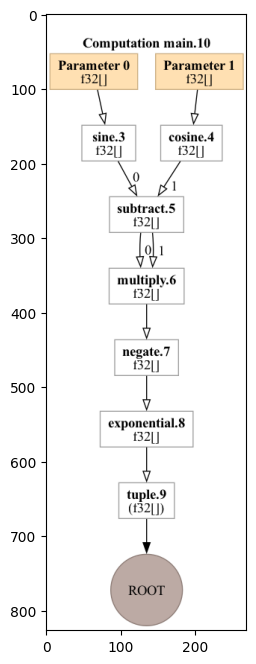

In [3]:
def func(x, y):
    return np.exp(-(np.sin(x) - np.cos(y)) ** 2)


def grad_func(x, y):
    return grad(func)(x, y)


z = jax.xla_computation(func)(1.0, 2.0)
with open("t.dot", "w") as f:
    f.write(z.as_hlo_dot_graph())

!dot t.dot  -Tpng > t.png


plt.figure(figsize=(10, 8))
img = mpimg.imread('t.png')
plt.imshow(img)
plt.show()

In [4]:
f = lambda A: np.trace(jax.scipy.linalg.expm(A))

A = jax.random.normal(jax.random.PRNGKey(0), (2, 2))

auto_grad = grad(f)(A)

my_grad = jax.scipy.linalg.expm(A).T
np.allclose(auto_grad, my_grad)

Array(True, dtype=bool)

In [14]:
import jax
import jax.numpy as jnp
from jax import random

def f(x):
    return 0.5 * jnp.dot(x.T, x)

def f_after_gradient_ten_steps(x, alphas):
    for alpha in alphas:
        x -= alpha * 2 * x
    return f(x)

key = random.PRNGKey(0)
alphas = random.uniform(key, shape=(10,), minval=0.0, maxval=0.1)
x = random.uniform(key, shape=(1000,), minval=0.0, maxval=1.0)

@jax.jit
def alpha_gd(alphas, b=1e-3):
    for _ in range(20):
        L = f_after_gradient_ten_steps(x, alphas)
        grad_fn = jax.grad(lambda a: f_after_gradient_ten_steps(x, a))
        grad = grad_fn(alphas)
        alphas -= b * grad
    return alphas

L_before = f_after_gradient_ten_steps(x, alphas)
L_after = f_after_gradient_ten_steps(x, alpha_gd(alphas))
print('Value of the function minimum after the first gradient descent:', L_before)
print('Value of the function minimum after gradient descent over alphas:', L_after)
print(L_before < L_after)

Value of the function minimum after the first gradient descent: 25.569782
Value of the function minimum after gradient descent over alphas: 0.054673634
False


$$d(-\log\det X) = -\frac{d\det X}{\det X}=-\frac{det X \langle X^{-\top}, dX\rangle}{det X}\implies \nabla f(X) = -X^{-\top}$$

In [34]:
f = lambda A: -np.log(np.linalg.det(A))

A = jax.random.normal(jax.random.PRNGKey(0), (2, 2))

auto_grad = grad(f)(A)

my_grad = - np.linalg.inv(A.T)
np.allclose(auto_grad, my_grad)

Array(True, dtype=bool)